In [1]:
#Imports
import numpy as np
import pandas as pd
import talib as ta
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data

In [2]:
path = "C:\\Users\\rohit\\OneDrive\\Udacity ML\\machine-learning-master\\projects\\capstone\\Stock Time Series Analysis\\"
data = pd.read_csv(path+'ITC.NS.csv',index_col=[0],parse_dates=True,dayfirst=False)

In [3]:
#Remove NA's
data.dropna(inplace=True)
print (data.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-04-23  276.000000  277.200012  275.000000  275.500000  275.500000   
2018-04-24  276.000000  278.850006  274.649994  276.000000  276.000000   
2018-04-25  275.500000  276.299988  272.700012  274.100006  274.100006   
2018-04-26  274.549988  279.100006  273.000000  278.250000  278.250000   
2018-04-27  279.600006  280.950012  278.399994  279.399994  279.399994   

                Volume  
Date                    
2018-04-23  11746220.0  
2018-04-24   8449353.0  
2018-04-25   4928817.0  
2018-04-26  20282977.0  
2018-04-27   9732842.0  


# Features

In [4]:
#Filter only relevant columns
df = data[['Open','High','Low','Close']]

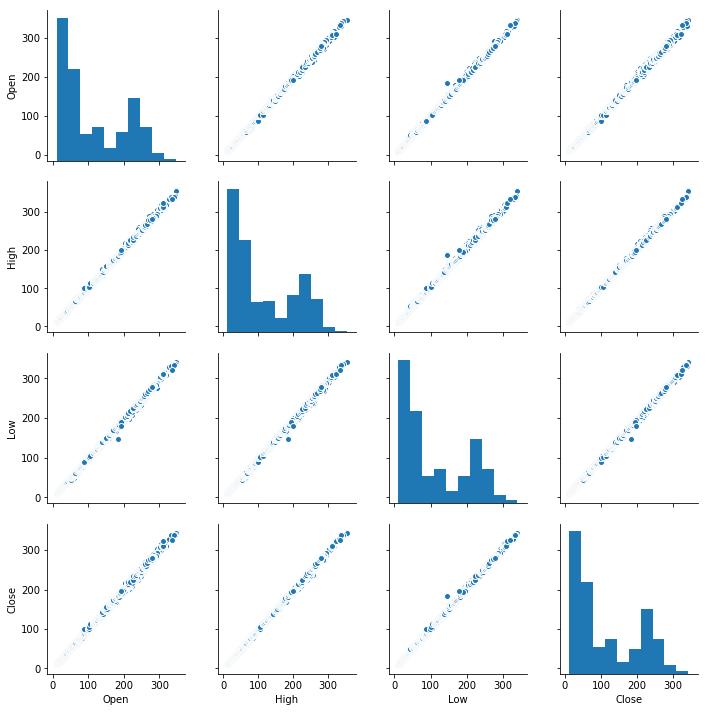

In [5]:
#Check correlation between columns
%matplotlib inline
g = sns.pairplot(df)

# Introduce New Features (Technical Indicators)

In [6]:
df['H-L'] = df['High'] - df['Low']
df['O-C'] = df['Open'] - df['Close']
df['RSI'] = ta.RSI(np.array(df['Close']),timeperiod=10)
df['ADX'] = ta.ADX(np.array(df['High']),np.array(df['Low']),np.array(df['Close']),timeperiod=7)
df['SAR'] = ta.SAR(np.array(df['High']),np.array(df['Low']),0.2,0.2)
df['Williams-R'] = ta.WILLR(df['High'].values, df['Low'].values, df['Close'].values, 7)

C:\Anaconda_Feb16\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
df.dropna(inplace=True)
df_filtered = df[['H-L','O-C','RSI','ADX','SAR','Williams-R']]

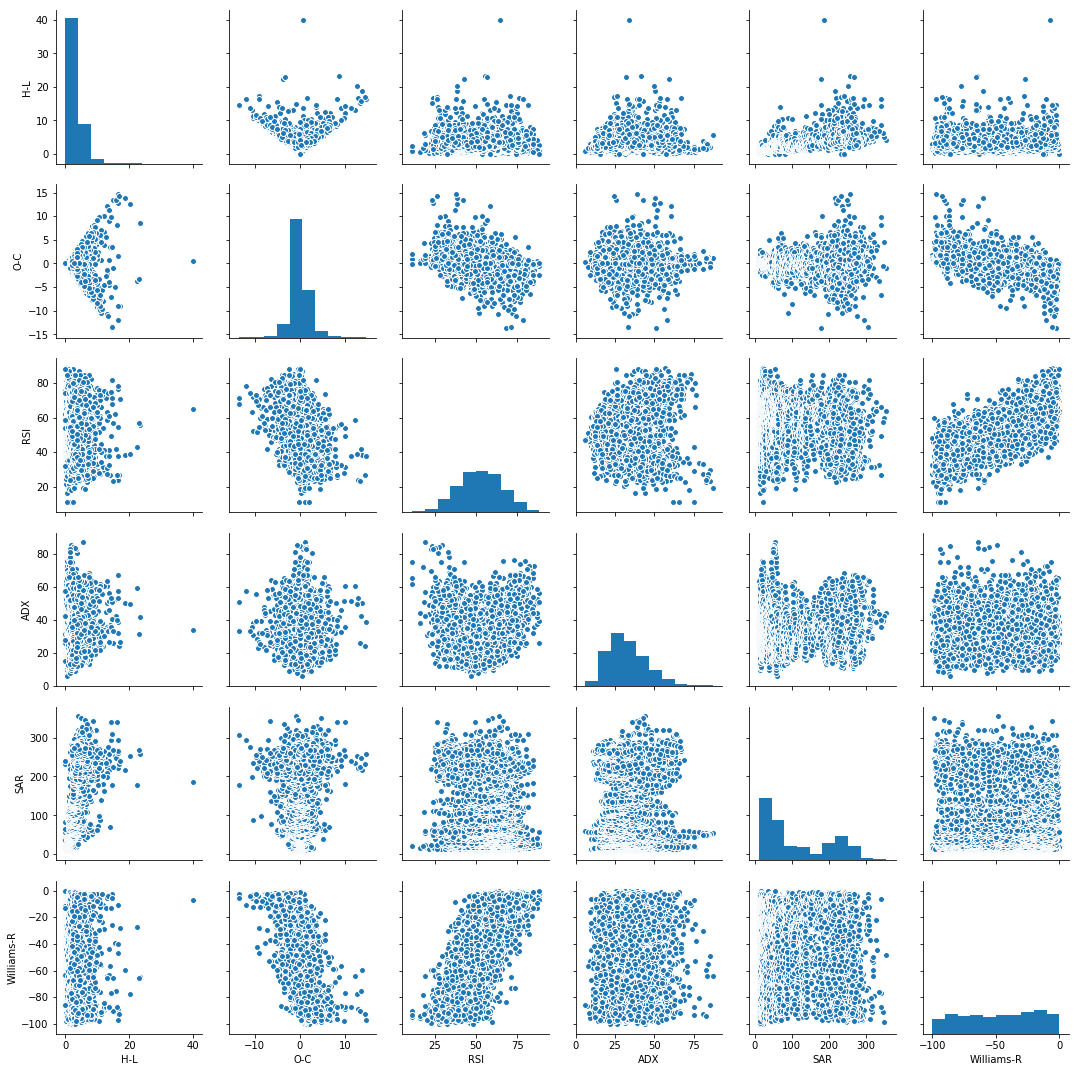

In [8]:
%matplotlib inline
g = sns.pairplot(df_filtered)

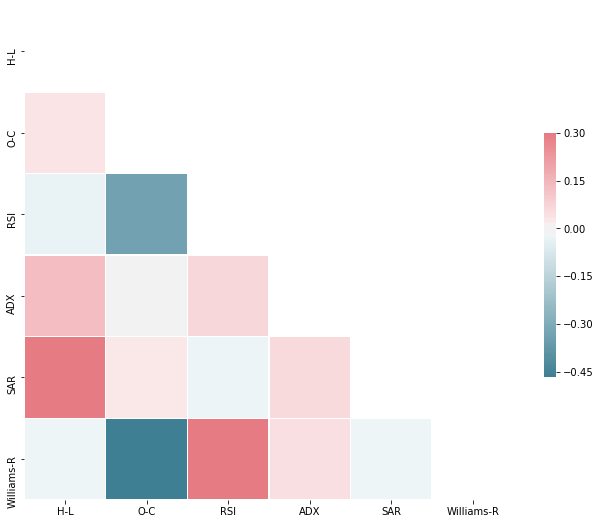

In [9]:
#Generate Correlation Matrix
corr = df_filtered.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Introduce Independent Variable

In [10]:
#Compare next day price with todays price
#If next days price greater than today then Price_change is 1 else 0
df['Price_Change'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [11]:
features = ['H-L','O-C','RSI','ADX','SAR','Williams-R']

X = df[features]
y = df['Price_Change']

# Perform Test Train Split

In [12]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3620 samples.
Testing set has 905 samples.


C:\Anaconda_Feb16\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Normalizing Features

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Neural Network

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [15]:
classifier = Sequential()
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
3620/3620 [==============================] - 2s 668us/step - loss: 0.2497 - acc: 0.5174
Epoch 2/100
3620/3620 [==============================] - 1s 412us/step - loss: 0.2494 - acc: 0.5202
Epoch 3/100
3620/3620 [==============================] - 1s 399us/step - loss: 0.2487 - acc: 0.5232
Epoch 4/100
3620/3620 [==============================] - 1s 398us/step - loss: 0.2485 - acc: 0.5232
Epoch 5/100
3620/3620 [==============================] - 1s 402us/step - loss: 0.2486 - acc: 0.5213
Epoch 6/100
3620/3620 [==============================] - 1s 398us/step - loss: 0.2484 - acc: 0.5224
Epoch 7/100
3620/3620 [==============================] - 1s 411us/step - loss: 0.2483 - acc: 0.5246
Epoch 8/100
3620/3620 [==============================] - 1s 407us/step - loss: 0.2482 - acc: 0.5215
Epoch 9/100
3620/3620 [==============================] - 1s 406us/step - loss: 0.2481 - acc: 0.5362
Epoch 10/100
3620/3620 [==============================] - 1s 405us/step - loss: 0.2480 - acc: 0.5345

3620/3620 [==============================] - 1s 166us/step - loss: 0.2122 - acc: 0.6575
Epoch 82/100
3620/3620 [==============================] - 1s 221us/step - loss: 0.2107 - acc: 0.6586
Epoch 83/100
3620/3620 [==============================] - 2s 436us/step - loss: 0.2101 - acc: 0.6613
Epoch 84/100
3620/3620 [==============================] - 2s 447us/step - loss: 0.2101 - acc: 0.6688
Epoch 85/100
3620/3620 [==============================] - 1s 404us/step - loss: 0.2095 - acc: 0.6644
Epoch 86/100
3620/3620 [==============================] - 1s 398us/step - loss: 0.2085 - acc: 0.6613
Epoch 87/100
3620/3620 [==============================] - 1s 405us/step - loss: 0.2075 - acc: 0.6669
Epoch 88/100
3620/3620 [==============================] - 1s 392us/step - loss: 0.2067 - acc: 0.6674
Epoch 89/100
3620/3620 [==============================] - 2s 421us/step - loss: 0.2063 - acc: 0.6710
Epoch 90/100
3620/3620 [==============================] - 1s 396us/step - loss: 0.2063 - acc: 0.6638
Epo

In [16]:
#Predictions
y_pred = classifier.predict(X_test)
#Differenciate between up markets and down markets predictions
y_pred = (y_pred > 0.5)

C:\Anaconda_Feb16\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda_Feb16\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Anaconda_Feb16\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

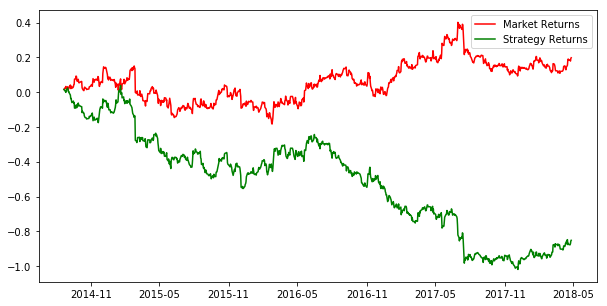

In [17]:
#Create a long short strategy
#If y_pred = True, go long, else short
import matplotlib.pyplot as plt

#Create dataframe to predict out of sample data
df['y_pred'] = np.NaN
df.iloc[(len(df) - len(y_pred)):,-1:] = y_pred
long_short_strategy = df.dropna()

#Get Next Day Returns
long_short_strategy['Tomorrows Returns'] = 0.
long_short_strategy['Tomorrows Returns'] = np.log(long_short_strategy['Close']/long_short_strategy['Close'].shift(1))
long_short_strategy['Tomorrows Returns'] = long_short_strategy['Tomorrows Returns'].shift(-1)

#If Signal is True, go Long else go Short
long_short_strategy['Strategy Returns'] = 0.
long_short_strategy['Strategy Returns'] = np.where(long_short_strategy['y_pred'] == True, long_short_strategy['Tomorrows Returns'],
                                             - long_short_strategy['Tomorrows Returns'])
#Generate cumulative returns
long_short_strategy['Cumulative Market Returns'] = np.cumsum(long_short_strategy['Tomorrows Returns'])
long_short_strategy['Cumulative Strategy Returns'] = np.cumsum(long_short_strategy['Strategy Returns'])

#Plot the data
plt.figure(figsize=(10,5))
plt.plot(long_short_strategy['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(long_short_strategy['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()

In [23]:
long_short_strategy.to_clipboard()

In [19]:
pred_df = pd.DataFrame(y_pred.flatten(),index=y_test.index,columns=['Pred'])

compare_df = pd.concat([y_test,pred_df.astype(int)],join='outer',axis=1)

In [20]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.49060773480662984

In [21]:
def equity_vol(rtn_series):
    '''
    daily return series
    '''
    
    vol = np.std(rtn_series)*np.sqrt(252)
    
    return vol

def equity_return(rtn_series):
    '''
    daily return series
    '''
    rtn_series.fillna(0, inplace=True)    
    
    equity_line = 100*(1+np.cumsum(rtn_series))
    
    equity_line_rtn = (equity_line.ix[-1]/100)**(252.0/(len(rtn_series)-1)) -1
    
    return equity_line_rtn

In [22]:
print (equity_vol(long_short_strategy['Strategy Returns']))
print (equity_vol(long_short_strategy['Tomorrows Returns']))

print (equity_return(long_short_strategy['Strategy Returns']))
print (equity_return(long_short_strategy['Tomorrows Returns']))

0.25886007975
0.259268248014
-0.412471681047
0.0517676037534


C:\Anaconda_Feb16\envs\tensorflow\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Anaconda_Feb16\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
